In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Box-Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints, i.e., equality and inequality constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Gx \leq h \\ & Ax = b
    \end{aligned}
\end{equation}
$$

For what about its usage in machine learning, i.e., for training *Support Vector Machines*, we are interested in a special case of this problem where the inequality constraints are expressed as box-constraints:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = 0 \\ & 0 \leq x \leq ub
    \end{aligned}
\end{equation}
$$

From the SVM *Wolfe dual* formulation we observe that the equality constraints $Ax = 0$ are used to control the bias term $b$ since they are intoduced following the lagrangian derivative w.r.t. $b$ (see (1.13), (2.8) and (3.7) in the *Computational Mathematics Report*). The simplest approach to learn the bias term $b$ is that of adding it at the end of the weights vector. So, we will need to solve a box-constrained quadratic problem:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & 0 \leq x \leq ub
    \end{aligned}
\end{equation}
$$

In [2]:
from optiml.opti import Quadratic
from optiml.opti.constrained import *
from optiml.opti.utils import generate_box_constrained_quadratic, plot_trajectory_optimization

In [3]:
Q, q, ub = generate_box_constrained_quadratic(ndim=2, seed=6)
quad = Quadratic(Q, q)

## Projected Gradient

iter	 cost		 gnorm
   0	-3.7375e+03	 3.2409e+02
   1	-4.5403e+03	 2.5232e+00
   2	-4.5470e+03	 1.3112e+00
   3	-4.5470e+03	 0.0000e+00

[9.63379013 9.32791922]


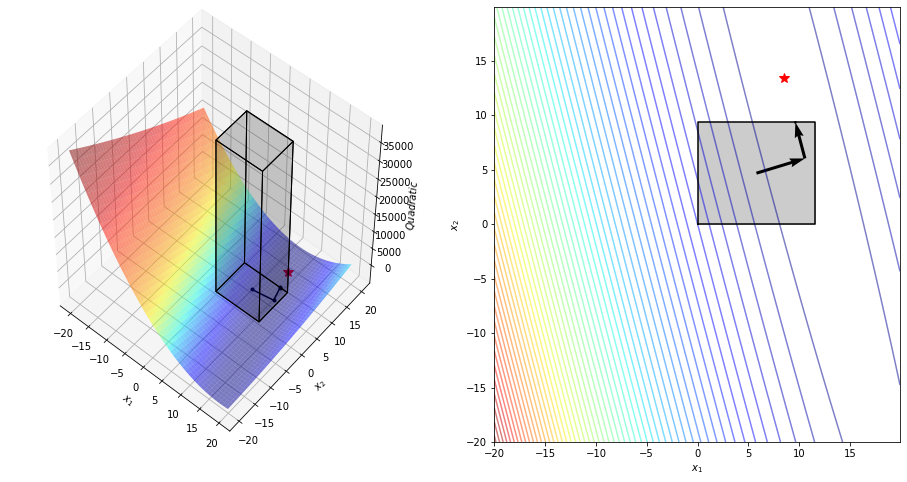

In [6]:
opt = ProjectedGradient(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Frank-Wolfe or Conditional Gradient

iter	 cost		 lb		 gap
   0	-3.7375e+03	-5.9539e+03	 5.9301e-01
  50	-4.5455e+03	-4.5475e+03	 4.3824e-04
 100	-4.5459e+03	-4.5474e+03	 3.3513e-04
 150	-4.5461e+03	-4.5473e+03	 2.7253e-04
 200	-4.5462e+03	-4.5473e+03	 2.3026e-04
 250	-4.5463e+03	-4.5472e+03	 1.9970e-04
 300	-4.5464e+03	-4.5472e+03	 1.7651e-04
 350	-4.5465e+03	-4.5472e+03	 1.5828e-04
 400	-4.5465e+03	-4.5472e+03	 1.4357e-04
 450	-4.5466e+03	-4.5472e+03	 1.3142e-04
 500	-4.5466e+03	-4.5471e+03	 1.2121e-04
 550	-4.5466e+03	-4.5471e+03	 1.1251e-04
 600	-4.5467e+03	-4.5471e+03	 1.0501e-04
 650	-4.5467e+03	-4.5471e+03	 9.8462e-05
 700	-4.5467e+03	-4.5471e+03	 9.2700e-05
 750	-4.5467e+03	-4.5471e+03	 8.7589e-05
 800	-4.5467e+03	-4.5471e+03	 8.3022e-05
 850	-4.5467e+03	-4.5471e+03	 7.8917e-05
 900	-4.5468e+03	-4.5471e+03	 7.5206e-05
 950	-4.5468e+03	-4.5471e+03	 7.1834e-05
1000	-4.5468e+03	-4.5471e+03	 6.8757e-05

[9.68064562 9.15510037]


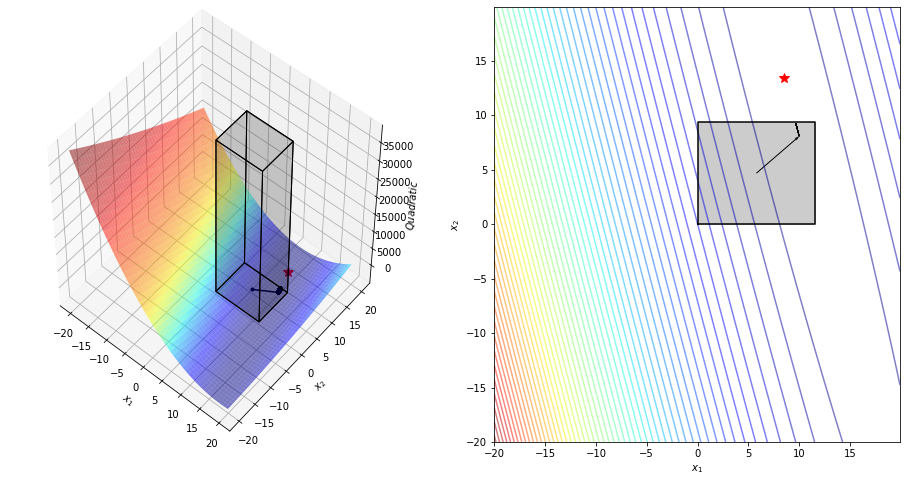

In [7]:
opt = FrankWolfe(f=quad, ub=ub, verbose=50).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Active Set

iter	 cost		|B|	I/O
   0	-3.7375e+03	0	I 0+1
   1	-4.3728e+03	1	

[7.24045607 9.32791922]


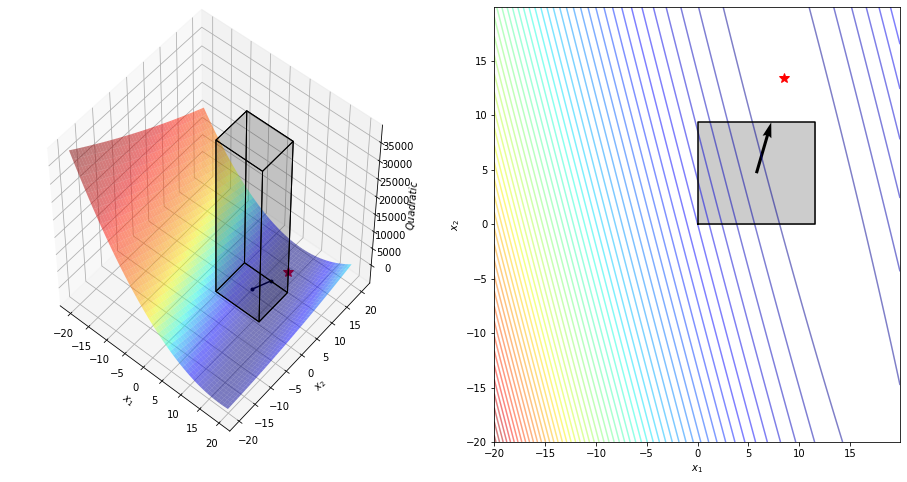

In [8]:
opt = ActiveSet(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Interior Point

iter	 cost		 p		 gap
   0	-3.7375e+03	-5.9539e+03	 5.9301e-01
   1	-4.5276e+03	-5.5727e+03	 2.3083e-01
   2	-4.4835e+03	-4.7936e+03	 6.9169e-02
   3	-4.5443e+03	-4.6083e+03	 1.4082e-02
   4	-4.5446e+03	-4.5553e+03	 2.3515e-03
   5	-4.5460e+03	-4.5486e+03	 5.7137e-04
   6	-4.5469e+03	-4.5473e+03	 9.3526e-05
   7	-4.5470e+03	-4.5471e+03	 1.4445e-05
   8	-4.5470e+03	-4.5470e+03	 1.9422e-06
   9	-4.5470e+03	-4.5470e+03	 2.9440e-07
  10	-4.5470e+03	-4.5470e+03	 3.9455e-08
  11	-4.5470e+03	-4.5470e+03	 5.9785e-09
  12	-4.5470e+03	-4.5470e+03	 8.0118e-10
  13	-4.5470e+03	-4.5470e+03	 1.2140e-10
  14	-4.5470e+03	-4.5470e+03	 1.6268e-11

[9.63379014 9.32791921]


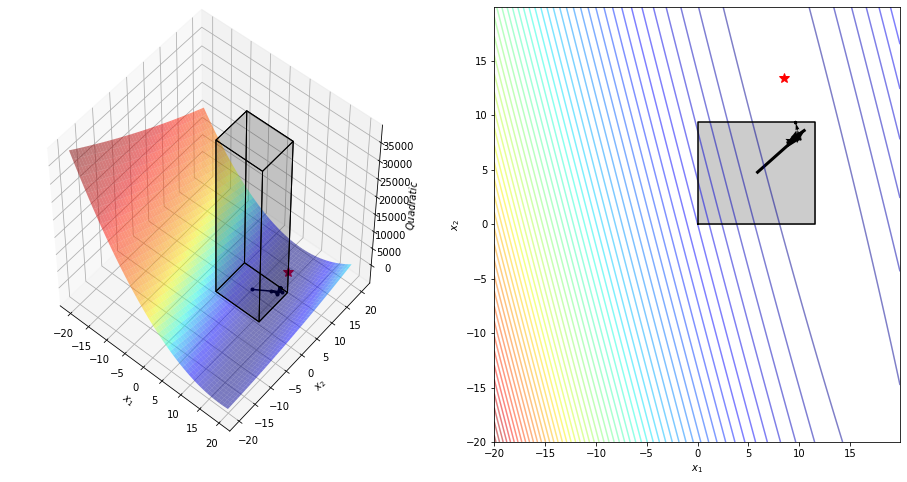

In [9]:
opt = InteriorPoint(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Lagrangian Dual

In [4]:
from optiml.opti.constrained import LagrangianDual
from optiml.opti.unconstrained.line_search import SteepestGradientDescent

iter	feval	 cost		 gnorm		ls	it	 astar
   0	   1	-4.5500e+03	 1.6689e+01	 1	 2	 3.8399e-01	ub: -4.5500e+03 - pcost:  4.5067e+03 - gap:  1.9905e+00
   1	   3	-4.4835e+03	 1.4863e+01	 1	10	 6.2473e-01	ub:  4.5067e+03 - pcost:  4.3482e+03 - gap: -3.5150e-02

[7.07754145 9.32791922]


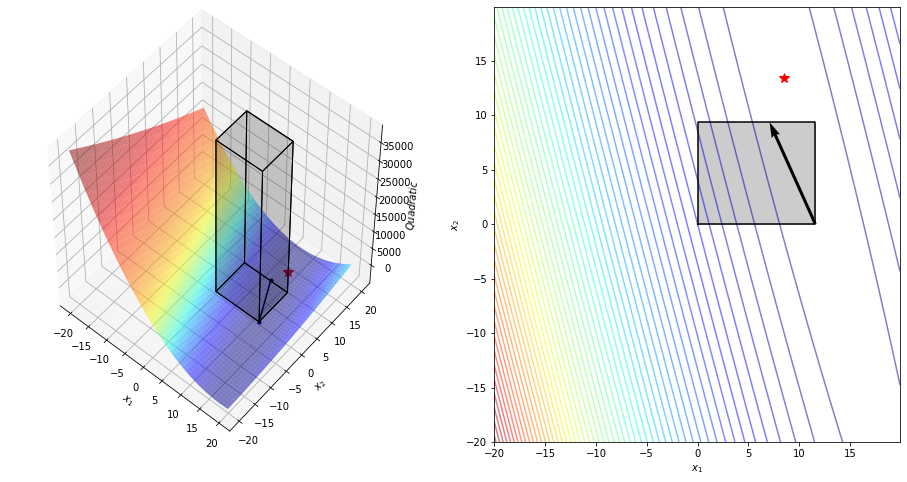

In [5]:
dual = LagrangianBoxConstrainedQuadratic(quad=quad, ub=ub)
opt = LagrangianDual(f=dual, optimizer=SteepestGradientDescent, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(dual.primal, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)